In [1]:
source(file.path("..", "R", "init.R"))
init()

[1] "Base folder = /home/luanabeckerdaluz/git/luanabeckerdaluz/apsimtestes"
[1] "Met folder = /home/luanabeckerdaluz/git/luanabeckerdaluz/apsimtestes/met_data"
[1] "Base simulations folder = /home/luanabeckerdaluz/git/luanabeckerdaluz/apsimtestes/base_simulations"
[1] "ApsimX Models folder = /usr/local/bin/Models"
[1] "Multicores = 2"


# Load SALib df

In [3]:
sensi_folder <- file.path(CONST_BASE_FOLDER, "tmp_sensi_20250214_224536")

df_salib <- read.csv(file.path(sensi_folder, "salib.csv"))
head(df_salib)

,names,field,variable,value,param
,<chr>,<chr>,<chr>,<dbl>,<chr>
1,phen_VegTherTimeResp_X3,CR16,S1,-1.370717e-14,yield
2,phen_VegTherTimeResp_X3,CR16,ST,4.210526e+00,yield
3,phen_VegTherTimeResp_X3,CR16,S1_conf,1.328490e-14,yield
4,phen_VegTherTimeResp_X3,CR16,ST_conf,4.080817e+00,yield
5,phen_RepTherTimeResp_X3,CR16,S1,-6.853583e-15,yield
6,phen_RepTherTimeResp_X3,CR16,ST,1.052632e+00,yield


# Organize dfs for plots

In [4]:
df_mutates <- df_salib %>%
  mutate(campo = substr(field, start = 1, stop = 2)) %>%
  # mutate(variable = case_when(
  #   grepl("ST", variable) ~ "St",
  #   grepl("S1", variable) ~ "Si",
  #   .default = NA)
  # ) %>%
  mutate(state = case_when(
    grepl("CA", field) ~ "PR",
    grepl("CR", field) ~ "RS",
    grepl("FW", field) ~ "RS",
    grepl("LO", field) ~ "PR",
    grepl("MB", field) ~ "PR",
    grepl("MV", field) ~ "GO",
    grepl("PI", field) ~ "SP",
    grepl("PL", field) ~ "MT",
    .default = NA)
  ) %>%
  mutate(system = case_when(
    grepl("a", field) ~ "r",
    grepl("c", field) ~ "r",
    grepl("e", field) ~ "r",
    grepl("b", field) ~ "i",
    grepl("d", field) ~ "i",
    grepl("f", field) ~ "i",
    .default = "0"
  )) %>%
  mutate(system_label = case_when(
    grepl("a", field) ~ "rainfed",
    grepl("c", field) ~ "rainfed",
    grepl("e", field) ~ "rainfed",
    grepl("b", field) ~ "irrigated",
    grepl("d", field) ~ "irrigated",
    grepl("f", field) ~ "irrigated",
    .default = '0'
  )) %>%
  tidyr::unite("campo_system", c("campo", "system"), sep = "", remove = FALSE) %>%
  mutate(year = case_when(
    grepl("13", field) ~ "2013",
    grepl("14", field) ~ "2014",
    grepl("15", field) ~ "2015",
    grepl("16", field) ~ "2016",
    grepl("17", field) ~ "2017",
    grepl("18", field) ~ "2018",
    .default = NA)
  ) %>%
  tidyr::unite("state_year", c("state", "year"), sep = "_", remove = FALSE) %>%
  mutate(field_i_r = case_when(
    grepl("FW14a", field) ~ "FW14",
    grepl("FW14b", field) ~ "FW14",
    grepl("FW14c", field) ~ "FW14",
    grepl("FW14d", field) ~ "FW14",
    grepl("FW14e", field) ~ "FW14",
    grepl("LO14a", field) ~ "LO14r",
    grepl("LO14b", field) ~ "LO14i",
    grepl("LO14c", field) ~ "LO14r",
    grepl("LO14d", field) ~ "LO14i",
    grepl("LO14e", field) ~ "LO14r",
    grepl("LO14f", field) ~ "LO14i",
    grepl("PI14a", field) ~ "PI14r",
    grepl("PI14b", field) ~ "PI14i",
    grepl("PI14c", field) ~ "PI14r",
    grepl("PI14d", field) ~ "PI14i",
    grepl("PI14e", field) ~ "PI14r",
    grepl("PI14f", field) ~ "PI14i",
    .default = field)
  ) %>%
  mutate(month = case_when(
    (campo == "FW" & grepl("a", field)) ~ "OUT1",
    (campo == "FW" & grepl("b", field)) ~ "OUT2",
    (campo == "FW" & grepl("c", field)) ~ "NOV1",
    (campo == "FW" & grepl("d", field)) ~ "NOV2",
    (campo == "FW" & grepl("e", field)) ~ "DEZ1",
    (campo == "LO" & grepl("a", field)) ~ "OUT1",
    (campo == "LO" & grepl("c", field)) ~ "OUT2",
    (campo == "LO" & grepl("e", field)) ~ "NOV2",
    (campo == "PI" & grepl("a", field)) ~ "OUT2",
    (campo == "PI" & grepl("c", field)) ~ "NOV1",
    (campo == "PI" & grepl("e", field)) ~ "JAN1",
    .default = NA)
  ) %>%
  mutate(names = case_when(
    grepl('phen_VegTherTimeResp_X3', names) ~ "V_Topt",
    grepl('phen_RepTherTimeResp_X3', names) ~ "R_Topt",
    grepl('phen_VegPhoMod_X1', names) ~ "V_Pcrit",
    grepl('phen_RepPhoMod_X1', names) ~ "R_Pcrit",
    grepl('phen_VegetativeTarget', names) ~ "Veget",
    grepl('phen_EarlyFloweringTarget', names) ~ "E_Flow",
    grepl('phen_EarlyPodDevTarget', names) ~ "E_Pod",
    grepl('phen_FractGrainFill', names) ~ "E_Grain",
    grepl('phen_MidGrainFill', names) ~ "M_Grain",
    grepl('phen_EntGrainFill', names) ~ "L_Grain",
    grepl('phen_Maturing', names) ~ "Matur",
    grepl('phen_Ripening', names) ~ "Ripen",
    grepl('leaf_RUE', names) ~ "RUE",
    grepl('leaf_ExtinctionCoef_Y1', names) ~ "Extinc",
    grepl('leaf_AreaLargLeaf', names) ~ "A_Leaf",
    grepl('leaf_Phyllochron', names) ~ "Phyll",
    grepl('grain_HarvIndex', names) ~ "H_ind",
    # grepl('root_EarlyFrontVel',names) ~ "EarlyRootFrontVel",
    # grepl('root_LateFrontVel',names) ~ "LateRootFrontVel",
    # grepl('nodule_VegGrowthRate',names) ~ "VegGrowthRate",
    # grepl('nodule_RepGrowthRate',names) ~ "RepGrowthRate",
    # grepl('nodule_MaxFixRate',names) ~ "MaxFixRate",
    # grepl('soil_KL',names) ~ "KL",
    .default = names)
  ) %>%
  mutate(
    names = factor(
      names,
      levels = rev(c("V_Topt", "R_Topt", "V_Pcrit", "R_Pcrit", "Veget", "E_Flow", "E_Pod", "E_Grain", "M_Grain", "L_Grain", "Matur", "Ripen", "RUE", "Extinc", "A_Leaf", "Phyll", "H_ind"))
    )
  ) %>%
  mutate(field_novo = case_when(
    grepl("CA", field) ~ "CA",
    grepl("CR", field) ~ "CR",
    grepl("FW", field) ~ "FW",
    grepl("MB", field) ~ "MB",
    grepl("MV", field) ~ "MV",
    grepl("PL", field) ~ "PL",
    grepl("LO14a", field) ~ "LOr",
    grepl("LO14b", field) ~ "LOi",
    grepl("LO14c", field) ~ "LOr",
    grepl("LO14d", field) ~ "LOi",
    grepl("LO14e", field) ~ "LOr",
    grepl("LO14f", field) ~ "LOi",
    grepl("PI14a", field) ~ "PIr",
    grepl("PI14b", field) ~ "PIi",
    grepl("PI14c", field) ~ "PIr",
    grepl("PI14d", field) ~ "PIi",
    grepl("PI14e", field) ~ "PIr",
    grepl("PI14f", field) ~ "PIi",
    .default = field)
  ) %>%
  arrange(names, field, variable)
  # # Generate Int
  # tidyr::pivot_wider(names_from = variable, values_from = value) %>%
  # # mutate(Int = ST - S1) %>%
  # tidyr::pivot_longer(cols = c(ST, S1, ST_conf, S1_conf), names_to = "variable", values_to = "value")
  # # tidyr::pivot_longer(cols = c(ST, S1, ST_conf, S1_conf, Int), names_to = "variable", values_to = "value")

dim(df_mutates)
head(df_mutates, 10)
unique(df_mutates$param)

[1] 4600   15

,names,field,variable,value,param,campo_system,campo,state_year,state,system,system_label,year,field_i_r,month,field_novo
,<fct>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,H_ind,CA14,S1,5.898404e-15,yield,CA0,CA,PR_2014,PR,0,0,2014,CA14,NA,CA
2,H_ind,CA14,S1,-1.364436e-14,biomass,CA0,CA,PR_2014,PR,0,0,2014,CA14,NA,CA
3,H_ind,CA14,S1_conf,NA,yield,CA0,CA,PR_2014,PR,0,0,2014,CA14,NA,CA
4,H_ind,CA14,S1_conf,1.280350e-14,biomass,CA0,CA,PR_2014,PR,0,0,2014,CA14,NA,CA
5,H_ind,CA14,ST,1.052632e+00,yield,CA0,CA,PR_2014,PR,0,0,2014,CA14,NA,CA
6,H_ind,CA14,ST,1.052632e+00,biomass,CA0,CA,PR_2014,PR,0,0,2014,CA14,NA,CA
7,H_ind,CA14,ST_conf,NA,yield,CA0,CA,PR_2014,PR,0,0,2014,CA14,NA,CA
8,H_ind,CA14,ST_conf,9.877613e-01,biomass,CA0,CA,PR_2014,PR,0,0,2014,CA14,NA,CA
9,H_ind,CA15,S1,-8.644633e-15,yield,CA0,CA,PR_2015,PR,0,0,2015,CA15,NA,CA


[1] "yield"   "biomass"

## df for other plots

In [20]:
df_other_plots <- df_mutates %>%
  # filter(variable == "St") %>%
  # select(-variable) %>%
  filter(param %in% c("yield", "biomass", "flowering", "maturity"))

unique(df_other_plots$param)
head(df_other_plots)

[1] "yield"     "biomass"   "flowering" "maturity"

names,field,variable,value,param,campo_system,campo,state_year,state,system,system_label,year,field_i_r,month,field_novo
<fct>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
H_ind,CA15,S1,0.0026394103,yield,CA0,CA,PR_2015,PR,0,0,2015,CA15,NA,CA
H_ind,CA15,S1,0.0024260787,biomass,CA0,CA,PR_2015,PR,0,0,2015,CA15,NA,CA
H_ind,CA15,S1,0.0005901568,flowering,CA0,CA,PR_2015,PR,0,0,2015,CA15,NA,CA
H_ind,CA15,S1,0.0008428614,maturity,CA0,CA,PR_2015,PR,0,0,2015,CA15,NA,CA
H_ind,CA15,S1_conf,0.0337030823,yield,CA0,CA,PR_2015,PR,0,0,2015,CA15,NA,CA
H_ind,CA15,S1_conf,0.0364290308,biomass,CA0,CA,PR_2015,PR,0,0,2015,CA15,NA,CA


# READY - Chart 1 - boxplots

In [21]:
df_boxplot <- df_mutates #%>%
  # filter(!param %in% c("GrainFilling", "PodDevelopment"))
unique(df_boxplot$param)
head(df_boxplot)

# df_boxplot <- df_boxplot %>%
#   mutate(names = case_when(
#     grepl("phen_VegAndTherTimeResp_X", names) ~ "VegAndTherTimeResp_X",
#     grepl("phen_VegAndRepPhoMod_X", names) ~ "VegAndRepPhoMod_X",
#     grepl("phen_VegetativeTarget", names) ~ "VegetativeTarget",
#     grepl("phen_EarlyFloweringTarget", names) ~ "EarlyFloweringTarget",
#     grepl("phen_FractGrainFill", names) ~ "FractGrainFill",
#     grepl("phen_EntGrainFill", names) ~ "EntGrainFill",
#     grepl("phen_Maturing", names) ~ "Maturing",
#     grepl("leaf_RUE", names) ~ "RUE",
#     grepl("leaf_AreaLargLeaf", names) ~ "AreaLargLeaf",
#     grepl("leaf_Phyllochron", names) ~ "Phyllochron",
#     grepl("grain_HarvIndex", names) ~ "HarvIndex",
#     grepl("root_EarlyFrontVel", names) ~ "EarlyFrontVel",
#     grepl("root_LateFrontVel", names) ~ "LateFrontVel",
#     grepl("nodule_VegGrowthRate", names) ~ "VegGrowthRate",
#     grepl("nodule_RepGrowthRate", names) ~ "RepGrowthRate",
#     grepl("nodule_MaxFixRate", names) ~ "MaxFixRate",
#     grepl("soil_KL", names) ~ "KL",
#     .default = names)
#   )
unique(df_boxplot$param)
head(df_boxplot)

[1] "yield"               "biomass"             "flowering"          
[4] "pod_development"     "start_grain_filling" "maturity"

names,field,variable,value,param,campo_system,campo,state_year,state,system,system_label,year,field_i_r,month,field_novo
<fct>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
H_ind,CA15,S1,0.0026394103,yield,CA0,CA,PR_2015,PR,0,0,2015,CA15,NA,CA
H_ind,CA15,S1,0.0024260787,biomass,CA0,CA,PR_2015,PR,0,0,2015,CA15,NA,CA
H_ind,CA15,S1,0.0005901568,flowering,CA0,CA,PR_2015,PR,0,0,2015,CA15,NA,CA
H_ind,CA15,S1,0.0006700429,pod_development,CA0,CA,PR_2015,PR,0,0,2015,CA15,NA,CA
H_ind,CA15,S1,0.0002665830,start_grain_filling,CA0,CA,PR_2015,PR,0,0,2015,CA15,NA,CA
H_ind,CA15,S1,0.0008428614,maturity,CA0,CA,PR_2015,PR,0,0,2015,CA15,NA,CA


[1] "yield"               "biomass"             "flowering"          
[4] "pod_development"     "start_grain_filling" "maturity"

names,field,variable,value,param,campo_system,campo,state_year,state,system,system_label,year,field_i_r,month,field_novo
<fct>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
H_ind,CA15,S1,0.0026394103,yield,CA0,CA,PR_2015,PR,0,0,2015,CA15,NA,CA
H_ind,CA15,S1,0.0024260787,biomass,CA0,CA,PR_2015,PR,0,0,2015,CA15,NA,CA
H_ind,CA15,S1,0.0005901568,flowering,CA0,CA,PR_2015,PR,0,0,2015,CA15,NA,CA
H_ind,CA15,S1,0.0006700429,pod_development,CA0,CA,PR_2015,PR,0,0,2015,CA15,NA,CA
H_ind,CA15,S1,0.0002665830,start_grain_filling,CA0,CA,PR_2015,PR,0,0,2015,CA15,NA,CA
H_ind,CA15,S1,0.0008428614,maturity,CA0,CA,PR_2015,PR,0,0,2015,CA15,NA,CA


[1] "yield"               "biomass"             "flowering"          
[4] "pod_development"     "start_grain_filling" "maturity"

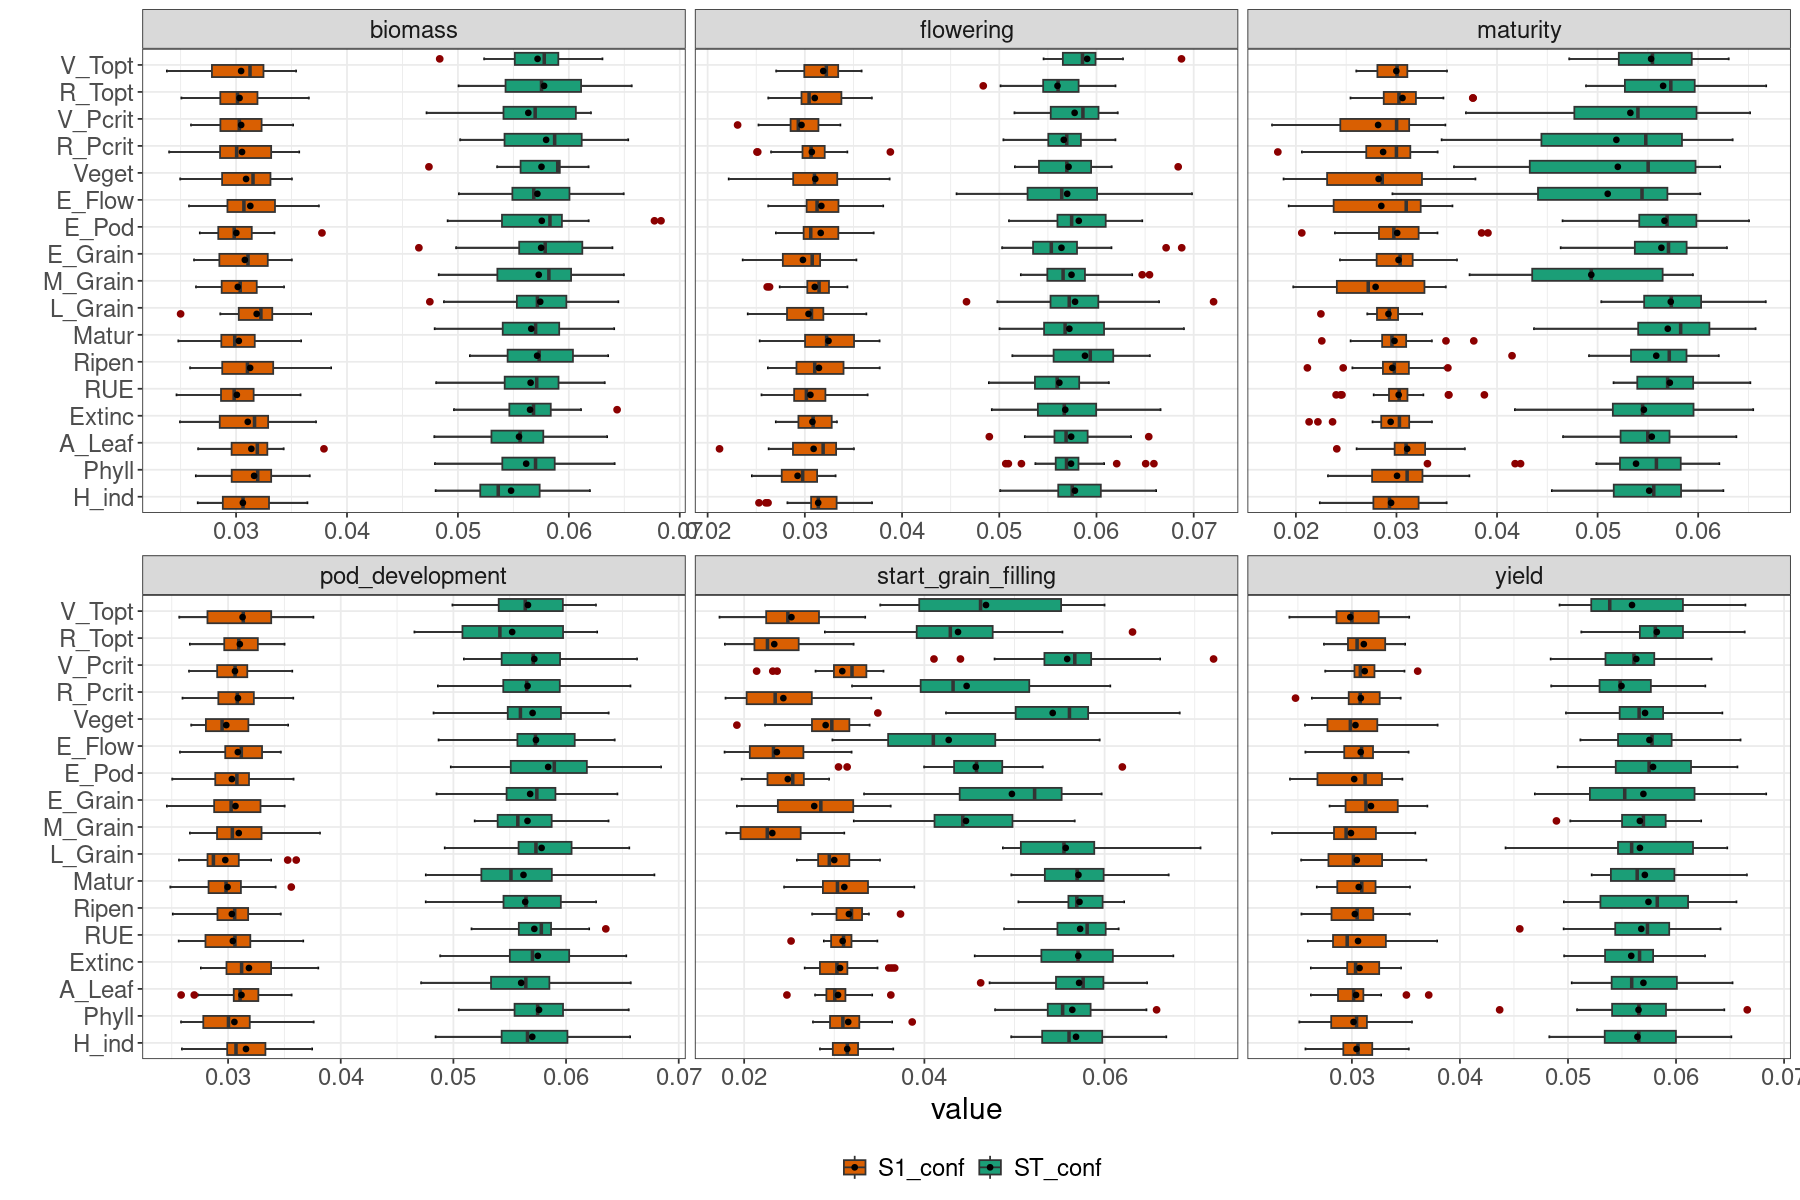

In [25]:
options(repr.plot.width = 15, repr.plot.height = 10)
# options(repr.plot.width = 20, repr.plot.height = 25)

unique(df_boxplot$param)

boxplot_plot <- df_boxplot %>%
  # filter(variable %in% c("S1", "S1_conf", "ST_conf")) %>%
  # filter(variable %in% c("S1_conf", "ST_conf")) %>%
  # filter(variable %in% c("S1", "S1_conf")) %>%
  filter(variable %in% c("ST_conf", "S1_conf")) %>%
  # filter(variable %in% c("ST_conf")) %>%
  filter(field != "PI14f") %>%
  # filter(!variable %in% c("ST_conf", "S1_conf")) %>%
  # filter(param != "Flowering") %>%
  # ggplot(aes(x = names, y = value, fill = factor(variable), colour = factor(variable))) +
  ggplot(aes(x = names, y = value, fill = factor(variable))) +
    facet_wrap(. ~ param, scales = "free_x") +
    # facet_wrap(field ~ ., ncol=7) +
    stat_boxplot(geom = "errorbar", width = 0.2, position = position_dodge(0.9), na.rm = TRUE) +
    geom_boxplot(alpha = 1, outlier.colour = "darkred", width = 0.9, position = position_dodge(0.9)) +
    stat_summary(fun = mean, geom = "point", shape = 20, size=2, color="black", position = position_dodge(0.9), na.rm = T) +
    scale_x_discrete(name = "") +
    # scale_x_discrete(name = "", limits = c(0, 0.05)) +
    scale_fill_brewer(name="", palette = "Dark2", direction = -1) +
    theme_bw() +
    # guides(colour = "none") +
    # scale_y_continuous(name = "", limits = c(0, 0.05)) +
    theme(
      legend.position = "bottom",
      # legend.position = c(.9, .75),
      # axis.text.x = element_text(color = "black", size=16, angle=30, vjust=.8, hjust=0.8),
      text = element_text(size = 18)
    ) +
    coord_flip()

boxplot_plot

# READY Bar polar

In [26]:
df_bar_polar <- df_mutates %>%
  # filter(param %in% c("yield", "biomass", "flowering", "maturity")) %>%
  # filter(param %in% c("yield", "biomass", "flowering", "maturity")) %>%
  filter(field != "PI14f") %>%
  select(-c(campo_system, system, system_label, field_i_r, month, field_novo))

unique(df_bar_polar$param)
dim(df_bar_polar)
head(df_bar_polar)
unique(df_bar_polar$names)
unique(df_bar_polar$param)

# df_bar_polar %>% filter(variable == "ST") %>% arrange(-value) %>% head(30)

[1] "yield"               "biomass"             "flowering"          
[4] "pod_development"     "start_grain_filling" "maturity"

[1] 8976    9

names,field,variable,value,param,campo,state_year,state,year
<fct>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
H_ind,CA15,S1,0.0026394103,yield,CA,PR_2015,PR,2015
H_ind,CA15,S1,0.0024260787,biomass,CA,PR_2015,PR,2015
H_ind,CA15,S1,0.0005901568,flowering,CA,PR_2015,PR,2015
H_ind,CA15,S1,0.0006700429,pod_development,CA,PR_2015,PR,2015
H_ind,CA15,S1,0.0002665830,start_grain_filling,CA,PR_2015,PR,2015
H_ind,CA15,S1,0.0008428614,maturity,CA,PR_2015,PR,2015


[1] H_ind   Phyll   A_Leaf  Extinc  RUE     Ripen   Matur   L_Grain M_Grain
[10] E_Grain E_Pod   E_Flow  Veget   R_Pcrit V_Pcrit R_Topt  V_Topt 
17 Levels: H_ind Phyll A_Leaf Extinc RUE Ripen Matur L_Grain ... V_Topt

[1] "yield"               "biomass"             "flowering"          
[4] "pod_development"     "start_grain_filling" "maturity"

In [27]:
1 / df_bar_polar %>% filter(variable == "S1") %>% pull(value) %>% max()
1 / df_bar_polar %>% filter(variable == "ST") %>% pull(value) %>% max()
1 / df_bar_polar %>% filter(variable == "S1_conf") %>% pull(value) %>% max()
1 / df_bar_polar %>% filter(variable == "ST_conf") %>% pull(value) %>% max()

[1] 30.80547

[1] 1.070574

[1] 25.57761

[1] 13.871

[1] "CR e PIFW"


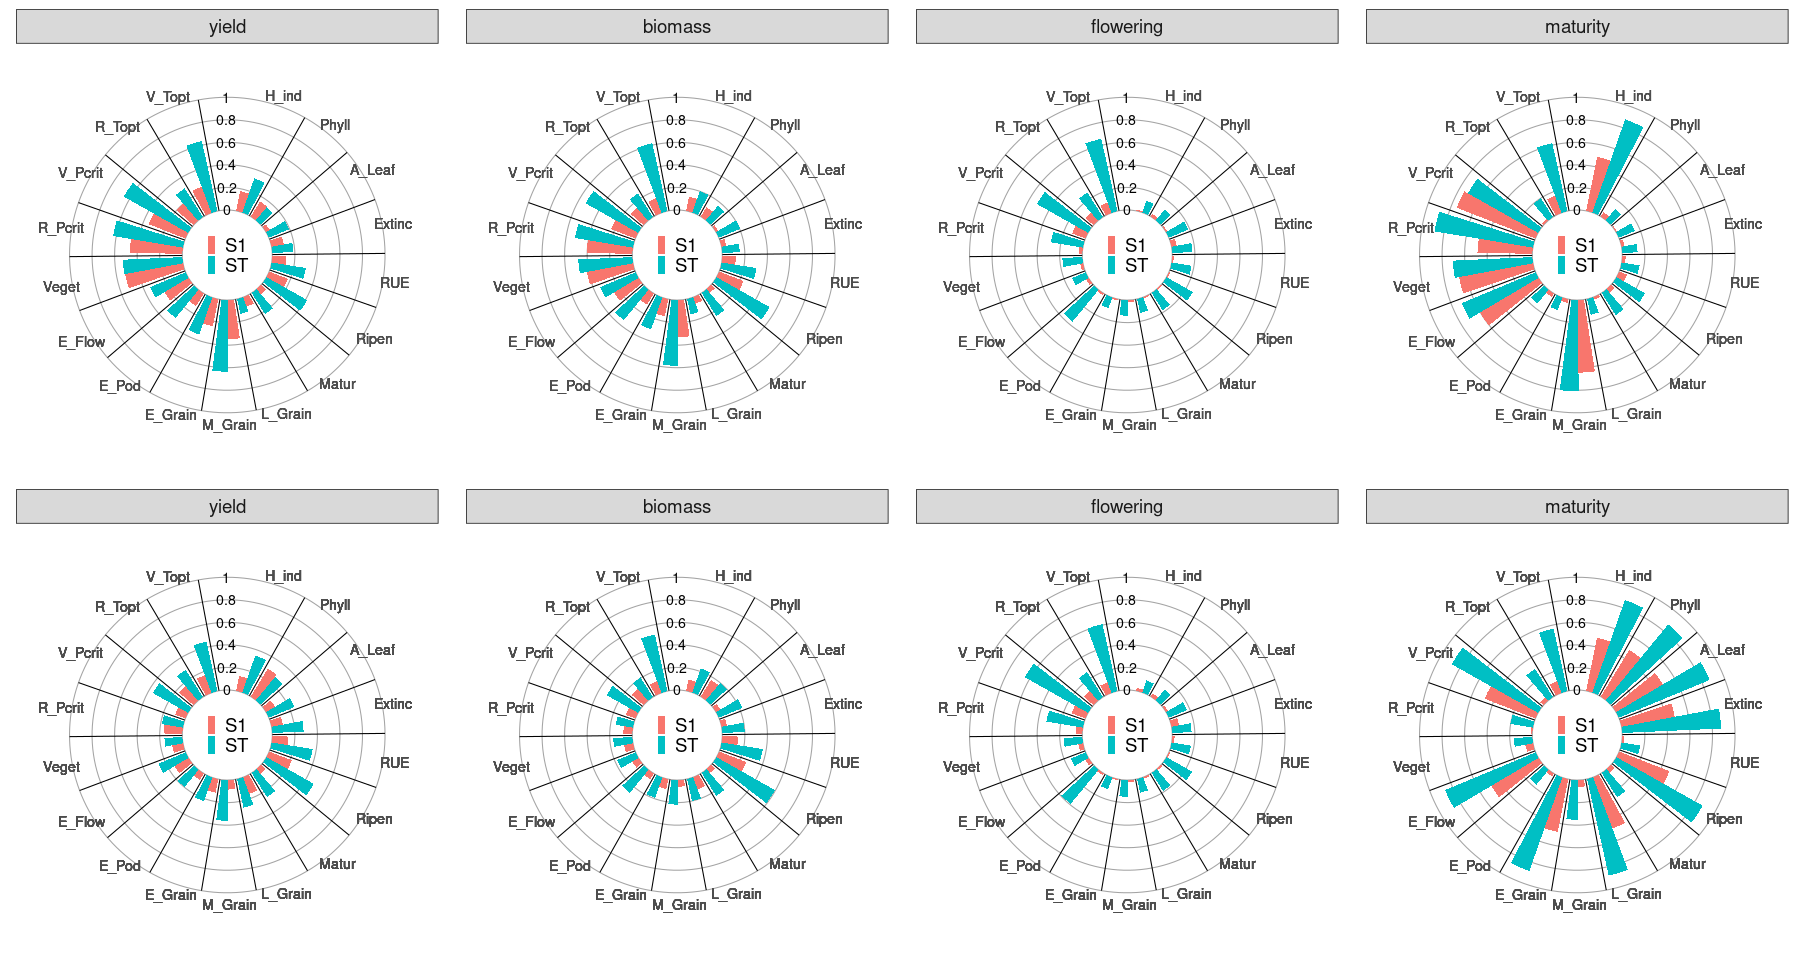

In [31]:
generate_polar_for_param <- function(df, xgrid, unique_names) {
  max_value <- 1 #round(max(df$value), 1) + 0.1
  max_value_limit <- max_value + 0.1
  # print(max_value)
  xgrid <- seq(0, max_value, 0.2)
  negative_start <- -0.4 * max_value
  # print(negative_start)

  ggplot(df, aes(x = names)) +
    geom_hline(yintercept = xgrid, colour = "#a4a4a4", size = 0.3) +
    geom_segment(
      data = data.frame(x = unique_names, y = 0, yend = max_value),
      aes(x = x, xend = x, y, yend = yend),
      colour = "#000000",
      size = 0.3,
      position = position_nudge(x = 0.5)
    ) +
    # geom_segment(data=data.frame(x = 0.5), x = 0.5, xend = 0.5, y = 0, yend = .8, colour = '#c54343', size = 0.3) +
    # geom_col(aes(y = value, fill = variable), width = 0.5, position = "identity") + #position=position_dodge(0.9)
    geom_col(aes(y = value, fill = variable), width = 0.8, position = position_dodge(0.8)) +
    # facet_grid(param ~ field) +
    # geom_errorbar(aes(ymin=value - conf, ymax=value + conf, colour=key),
    #               position=position_dodge(0.2), width=0.2) +
    geom_text(aes(label = names, y = max_value_limit), colour = "grey30", size = 3, na.rm = TRUE) +
    annotate(y = xgrid, x = 0, label = xgrid, geom = "text", size = 3) +
    coord_polar(start = -2 * pi / 17 * 0.5) +
    facet_wrap(param ~ ., scales = "free") +
    # scale_y_continuous(limits=c(-0.2, 0.36), expand=c(0,0)) +
    scale_y_continuous(limits = c(negative_start, max_value_limit)) +
    expand_limits(y = -0.1, x = -0.5) +
    theme_bw() +
    theme(
      panel.grid.major = element_blank(),
      axis.text = element_blank(),
      legend.title = element_blank(),
      panel.border = element_blank(),
      axis.ticks = element_blank(),
      axis.title = element_blank(),
      legend.position = c(0.5,0.5),
      plot.background = element_rect(colour = NA),
      legend.background = element_rect(fill = NA),
      # legend.text = element_text(size = 10),      # Ajuste o tamanho do texto da legenda
      # legend.key.size = unit(0.5, "cm"),
      legend.key.size = unit(0.2, "cm"),
      # legend.title = element_text(size = 16)
      text = element_text(size = 14)

    )
    # labs(fill="", colour="")
    # scale_fill_manual(values=hcl(c(15,195), 100, 70))
    # scale_colour_manual(values=hcl(c(15,195), 100, 40))
}

#========================================

grob_pra_um_campo <- function(field_array) {
  df_soh_sts1 <- df_bar_polar %>%
    filter(variable %in% c("ST", "S1")) %>%
    mutate(value = if_else(variable == "S1", value * 30, value)) %>%
    # mutate(value = if_else(variable == "S1_conf", value * 24, value)) %>%
    # mutate(value = if_else(variable == "ST_conf", value * 14, value)) %>% 
    filter(field %in% !!field_array)

  unique_names <- unique(df_bar_polar$names)

  p1 <- generate_polar_for_param(df_soh_sts1 %>% filter(param == "yield"), seq(0, 0.7, 0.1), unique_names)
  p2 <- generate_polar_for_param(df_soh_sts1 %>% filter(param == "biomass"), seq(0, 1, 0.1), unique_names)
  p3 <- generate_polar_for_param(df_soh_sts1 %>% filter(param == "flowering"), seq(0, 1, 0.1), unique_names)
  # p4 <- generate_polar_for_param(df_soh_sts1 %>% filter(param == "pod_development"), seq(0, 1, 0.1), unique_names)
  # p5 <- generate_polar_for_param(df_soh_sts1 %>% filter(param == "start_grain_filling"), seq(0, 1, 0.1), unique_names)
  p6 <- generate_polar_for_param(df_soh_sts1 %>% filter(param == "maturity"), seq(0, 1, 0.1), unique_names)
  # 'yield''biomass''flowering''pod_development''start_grain_filling''maturity'
  # p1
  # p2
  # p3
  # p4
  # arrangeGrob(p1, p2, p3, p4, p5, p6, nrow = 1, ncol = 6)
  arrangeGrob(p1, p2, p3, p6, nrow = 1, ncol = 4)
}

options(repr.plot.width = 15, repr.plot.height = 8)
# options(repr.plot.width = 20, repr.plot.height = 8)

# CR e PIFW
print("CR e PIFW")
grobCR <- grob_pra_um_campo(c("CR16", "CR17", "CR18"))
grobPIFW <- grob_pra_um_campo(c("FW14a", "FW14b", "PI14a", "PI14b", "PI14c", "PI14d"))
grid.arrange(grobCR, grobPIFW, nrow = 2, ncol = 1)

# # PI e FW
# print("PI e FW separados")
# grobPI <- grob_pra_um_campo(c("PI14a", "PI14b", "PI14c", "PI14d"))
# grobFW <- grob_pra_um_campo(c("FW14a", "FW14b"))
# grid.arrange(grobPI, grobFW, nrow = 2, ncol = 1)

# Salib vs. Number of Samples

## Salibs (~4min)

In [44]:
summarized_16000 <- read.csv("16000_summarized.csv")
dim(summarized_16000)
head(summarized_16000)

filterId_computeSalib_meanField <- function(from_id, to_id){
  salib  <- summarized_16000 %>% 
    filter(id >= from_id, id <= to_id) %>% 
    compute_salib_for_all_params_each_field() %>%
    group_by(param, variable) %>% 
    reframe(
      value_mean = mean(value),
      value_median = median(value)
    )
  return (salib)
}
salib4250  <- filterId_computeSalib_meanField(1, 4000)
salib8500  <- filterId_computeSalib_meanField(1, 8000)
salib12750 <- filterId_computeSalib_meanField(1, 12000)
salib17000 <- filterId_computeSalib_meanField(1, 16000)

[1] 512000      8

,id,field,Yield,Biomass,Flowering,PodDevelopment,GrainFilling,Maturity
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,1,CA14,2153.623,6273.126,49,65,75,132
2,1,CA15,2812.971,8183.395,51,69,80,135
3,1,CA16,1782.825,5221.686,45,60,70,124
4,1,CR16,2705.941,7870.557,53,73,83,140
5,1,CR17,2940.398,8327.918,58,77,89,147
6,1,CR18,3283.439,9363.320,58,76,87,146


## Plot salib vs. number of samples

In [82]:
salibs_quebradas <- rbind(
    salib4250 %>% mutate(type = "4000"),
    salib8500 %>% mutate(type = "8000"),
    salib12750 %>% mutate(type = "12000"),
    salib17000 %>% mutate(type = "16000")
)
head(salibs_quebradas, 10)

param,variable,value_mean,value_median,type
<chr>,<chr>,<dbl>,<dbl>,<chr>
Biomass,S1,0.0001650835,0.0001295504,4000
Biomass,ST,0.3242767609,0.3232610634,4000
Flowering,S1,0.0001650835,0.0001295504,4000
Flowering,ST,0.3242767609,0.3232610634,4000
GrainFilling,S1,0.0001650835,0.0001295504,4000
GrainFilling,ST,0.3242767609,0.3232610634,4000
Maturity,S1,0.0001650835,0.0001295504,4000
Maturity,ST,0.3242767609,0.3232610634,4000
PodDevelopment,S1,0.0001650835,0.0001295504,4000


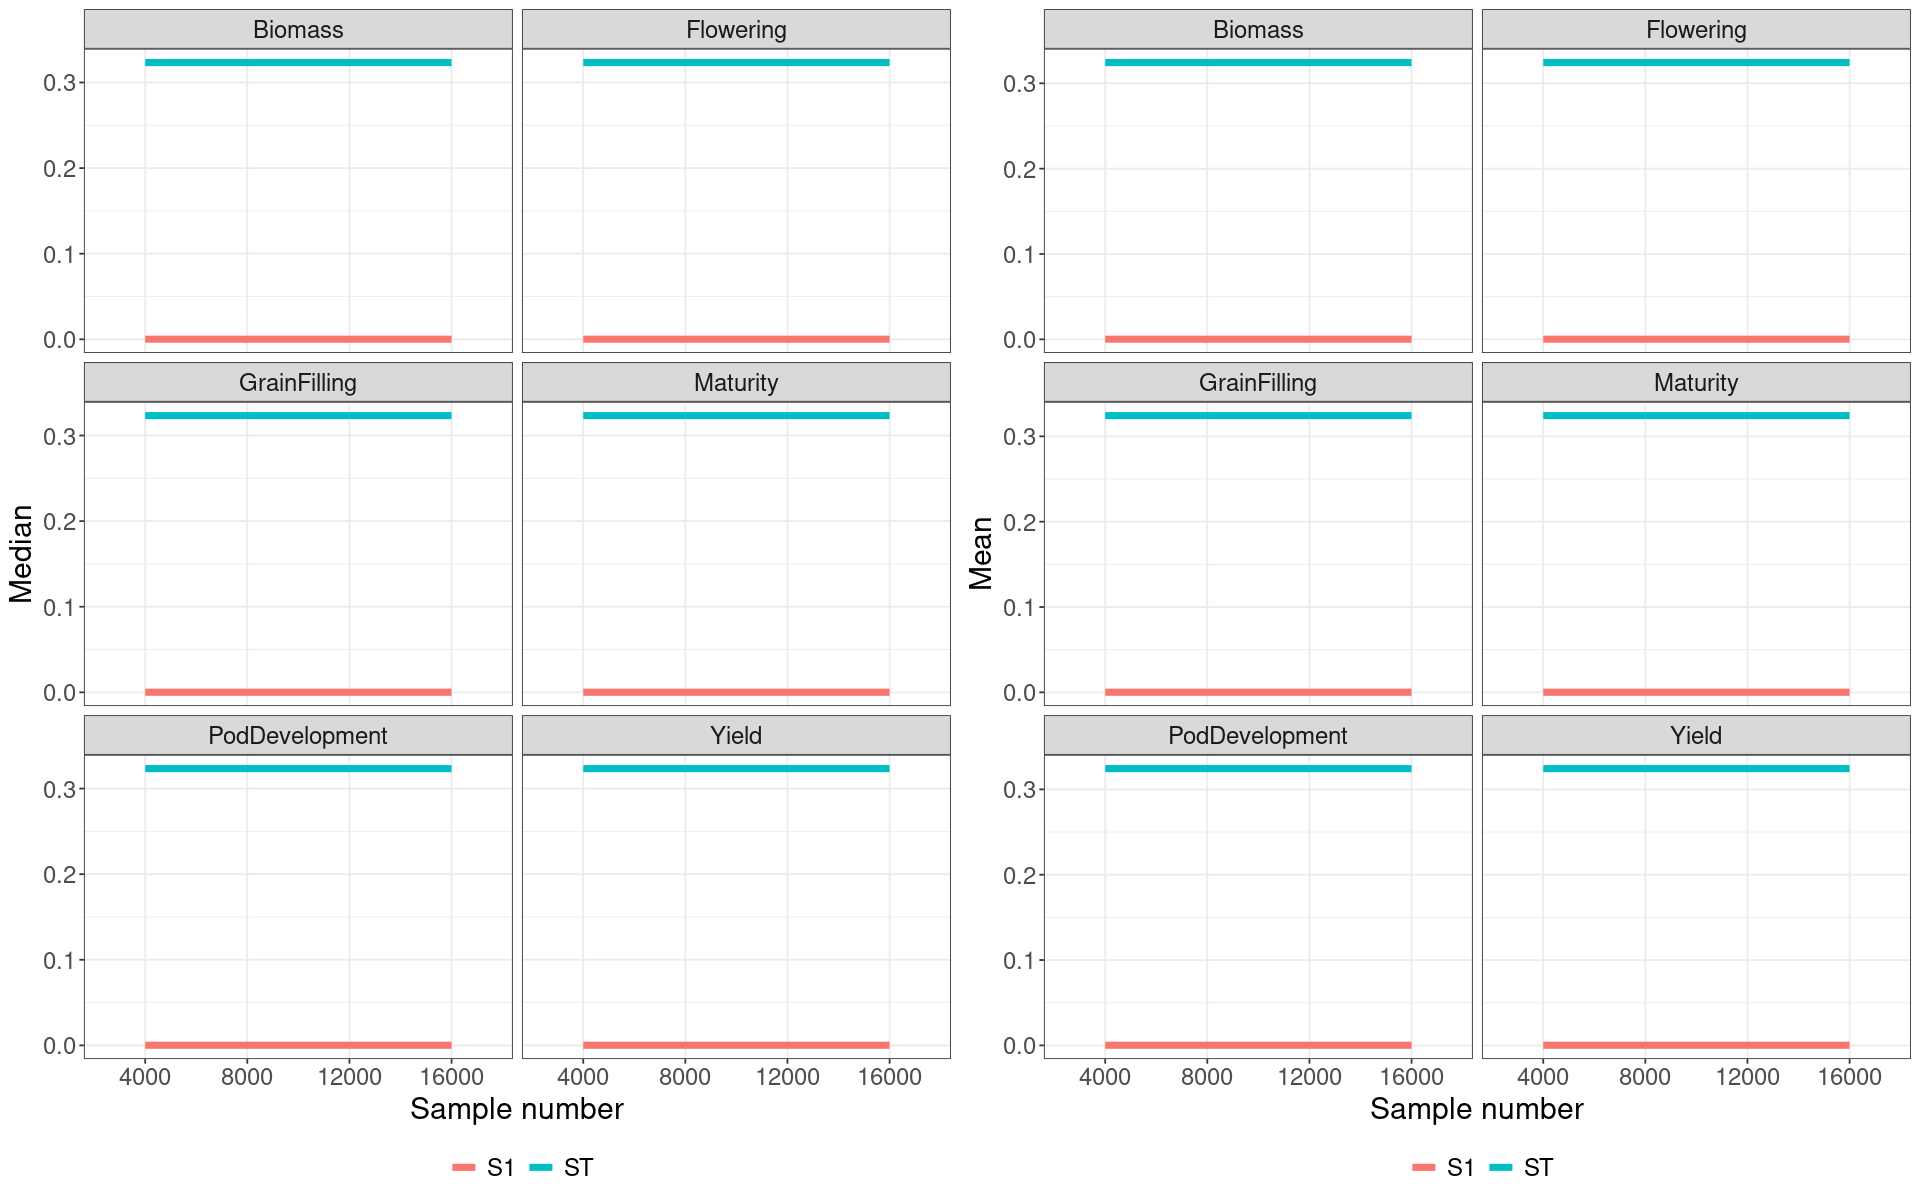

In [88]:
options(repr.plot.width = 10, repr.plot.height = 10)

levels <- c("4000","8000","12000","16000")

box_median <- salibs_quebradas %>%
  ggplot() +
  facet_wrap(param ~ ., ncol = 2) + 
  geom_line(aes(x=factor(type, levels = levels), y=value_median, group=factor(variable), colour=factor(variable)), lwd=2) +
  # scale_fill_brewer(name="", palette = "Set2", direction = -1) +
  theme_bw() +
  scale_y_continuous(name = "Median") +
  scale_x_discrete(name = "Sample number") +
  scale_colour_discrete(name = "") +
  theme(
    legend.position = "bottom",
    # legend.position = c(.9, .75),
    # axis.text.x = element_text(color = "black", size=16, angle=30, vjust=.8, hjust=0.8),
    text = element_text(size = 18)
  )
# box_median


box_mean <- salibs_quebradas %>%
  ggplot() +
  facet_wrap(param ~ ., ncol = 2) + 
  geom_line(aes(x=factor(type, levels = levels), y=value_mean, group=factor(variable), colour=factor(variable)), lwd=2) +
  # scale_fill_brewer(name="", palette = "Set2", direction = -1) +
  theme_bw() +
  scale_y_continuous(name = "Mean") +
  scale_x_discrete(name = "Sample number") +
  scale_colour_discrete(name = "") +
  theme(
      legend.position = "bottom",
      # legend.position = c(.9, .75),
      # axis.text.x = element_text(color = "black", size=16, angle=30, vjust=.8, hjust=0.8),
      text = element_text(size = 18)
  )
# box_mean


options(repr.plot.width = 16, repr.plot.height = 10)
grid.arrange(box_median, box_mean, nrow=1, ncol=2)

In [87]:
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




# READY - Chart 2 - Heatmap by city

In [ ]:
library(colorspace)

Aí, um outro heatmap, cor diferent se der, usa os mesmos dados de rankeamento: va ser da condições cimáticas: vão ser 4 estados (RS (caraziho), PR (faz a média das safras iguais de castro e mambore), MT e GO). Isso vai ficar tipo: RS16, RS17, RS18................ não usar londrina, piracicaba e frederico aqui....... só para yield tbm

In [20]:
by_state_df <- df_other_plots %>%
  # filter(!campo %in% c('FW', 'LO', 'PI')) %>%
  # filter(param == "Yield") %>% 
  select(-c(field, campo, state, system, year, field_i_r)) %>%
  group_by(param, field_novo, names) %>%
  summarise(
    mean = mean(value),
  ) %>%
  mutate(rank = as.integer(rank(-mean)))

dim(by_state_df)
head(by_state_df)

`summarise()` has grouped output by 'param', 'field_novo'. You can override
using the `.groups` argument.


[1] 612   5

param,field_novo,names,mean,rank
<chr>,<chr>,<chr>,<dbl>,<int>
biomass,CA,grain_HarvIndex,0.3962548,4
biomass,CA,leaf_AreaLargLeaf,0.1440260,14
biomass,CA,leaf_ExtinctionCoef_Y1,0.3830285,5
biomass,CA,leaf_Phyllochron,0.1351320,16
biomass,CA,leaf_RUE,0.1854701,12
biomass,CA,phen_EarlyFloweringTarget,0.3545209,6


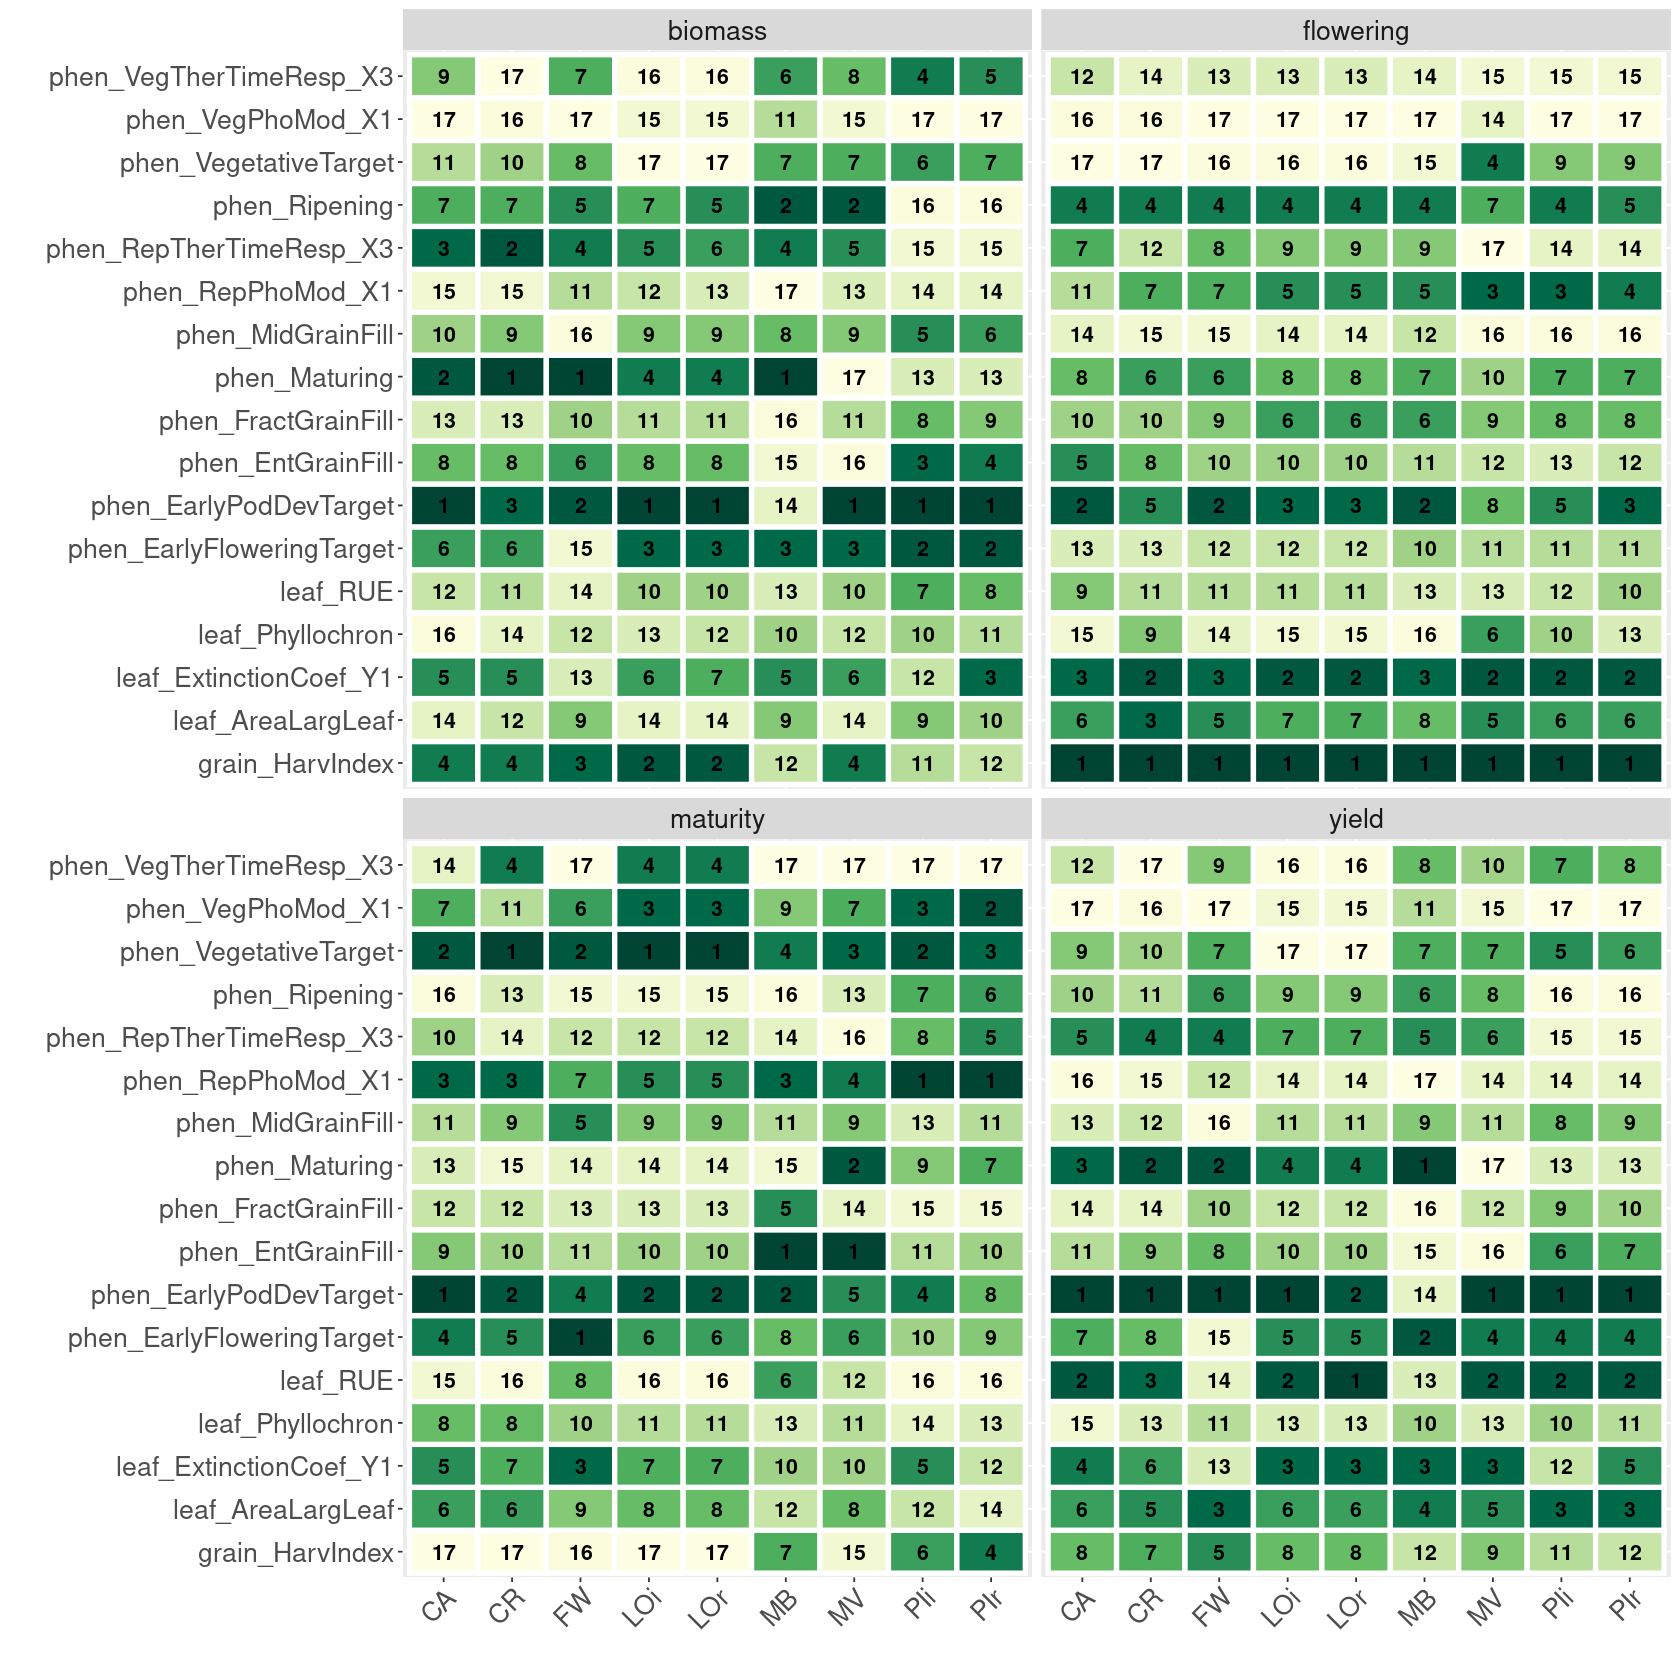

In [21]:
# options(repr.plot.width=12, repr.plot.height=8)
options(repr.plot.width = 14, repr.plot.height = 14)

ggplot(data = by_state_df, aes(x=field_novo, y=names, fill = factor(rank))) +
  geom_tile(color = "white", lwd = 1.5, linetype = 1) +
  geom_text(aes(label = round(rank, 2)), color = "black", size = 4.5, fontface = "bold", check_overlap = TRUE) +
facet_wrap(param ~ .) +
  # scale_fill_viridis_d(
  #     name = "Influence Rank",
  #     guide = guide_legend(nrow = 1),
  #     option = "plasma"
  # ) + 
scale_fill_discrete_sequential(
  rev = F,
  # palette = "RedOr",
  palette = "YlGn",
  guide = guide_legend(nrow = 1)
) +
scale_x_discrete(name = "") +
scale_y_discrete(name = "") +
theme(
  legend.position = "none",
  text = element_text(size = 20),
  axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),
  legend.spacing.y = grid::unit(5, "cm")
)

# DEPRECATED - Chart 3 - Heatmap datas semeadura

o terceiro heatmap seria para datas de semadura, existem 3 campos que variaram, então vai usar apenas londrina, pira e frederico. Aí, eu pensei de colocar as datas ao invés da data colocar Nov_1, NOv_2 e tals. Aí embaixo no eixo x ficaria: OUT_1, OUT_2, NOV_1........... não precisa aparecer o nome das cidades..... só pra yield tbm não precisa grid

In [97]:
# by_sowing_month <- df_other_plots %>%
#     # filter(fert == "no") %>% 
#     # select(-fert) %>% 
#     filter(campo %in% c('FW', 'LO', 'PI')) %>%
#     filter(param == "Yield") %>%
#     filter(!is.na(month)) %>%
#     select(c(names, month, value)) %>%
#     group_by(month, names) %>%
#     summarise(
#         mean = mean(value),
#         .groups = 'drop_last'
#     ) %>%
#     mutate(rank = as.integer(rank(-mean)))


# dim(by_sowing_month)
# head(by_sowing_month)

In [98]:
# options(repr.plot.width=12, repr.plot.height=8)

# ggplot(data = by_sowing_month, aes(x=month, y=names, fill=factor(rank))) +
#     geom_tile(color = "white", lwd = 1.5, linetype = 1) +
#     geom_text(aes(label = round(rank, 2)), color = "black", size = 4.5, fontface = "bold", check_overlap = TRUE) +
#     # scale_fill_viridis_d(
#     #     name = "Influence Rank",
#     #     guide = guide_legend(nrow = 1),
#     #     option = "plasma"
#     # ) + 
#     # scale_fill_discrete_sequential(rev = F, palette = "Terrain 2", guide = guide_legend(nrow = 1)) + 
#     scale_fill_discrete_sequential(rev = F, palette = "YlGn", guide = guide_legend(nrow = 1)) + 
#     scale_x_discrete(name = "Month") + 
#     scale_y_discrete(name = "") + 
#     theme(
#         legend.position = "none",
#         text = element_text(size = 20),
#         # axis.text.x = element_text(angle = 45, vjust = 1, hjust=1),
#         legend.spacing.y = grid::unit(5, "cm")
#     )

# READY - Chart 4 - Bar plot

aí, o graficos de barras, seria para as diferentes localizações. oU seja,, faz a média para os campos iguais. Aí no eixo x iriam os parametros e as barrinhas seriam os campos, tipo CA, CR, MB, PI vai ficar comprido, pensei que talvez seja melhor deitado ou dá pra inverter tbm, x os campos e barrinhas os parametros. Esse não é pro rankeamento apenas para o valor de ST............ eu queria um grid desse, para 4 variáveis de saída, yield, biomass, flowering e maturing

In [22]:
bar_df <- df_other_plots %>%
  # filter(fert == "no") %>%
  select(-c(field)) %>%
  group_by(param, campo, names) %>%
  summarise(
    mean = mean(value),
  )

dim(bar_df)
head(bar_df)

`summarise()` has grouped output by 'param', 'campo'. You can override using
the `.groups` argument.


[1] 476   4

param,campo,names,mean
<chr>,<chr>,<fct>,<dbl>
biomass,CA,H_ind,0.07193476
biomass,CA,Phyll,0.06301959
biomass,CA,A_Leaf,0.07230573
biomass,CA,Extinc,0.06096344
biomass,CA,RUE,0.10044834
biomass,CA,Ripen,0.14761419


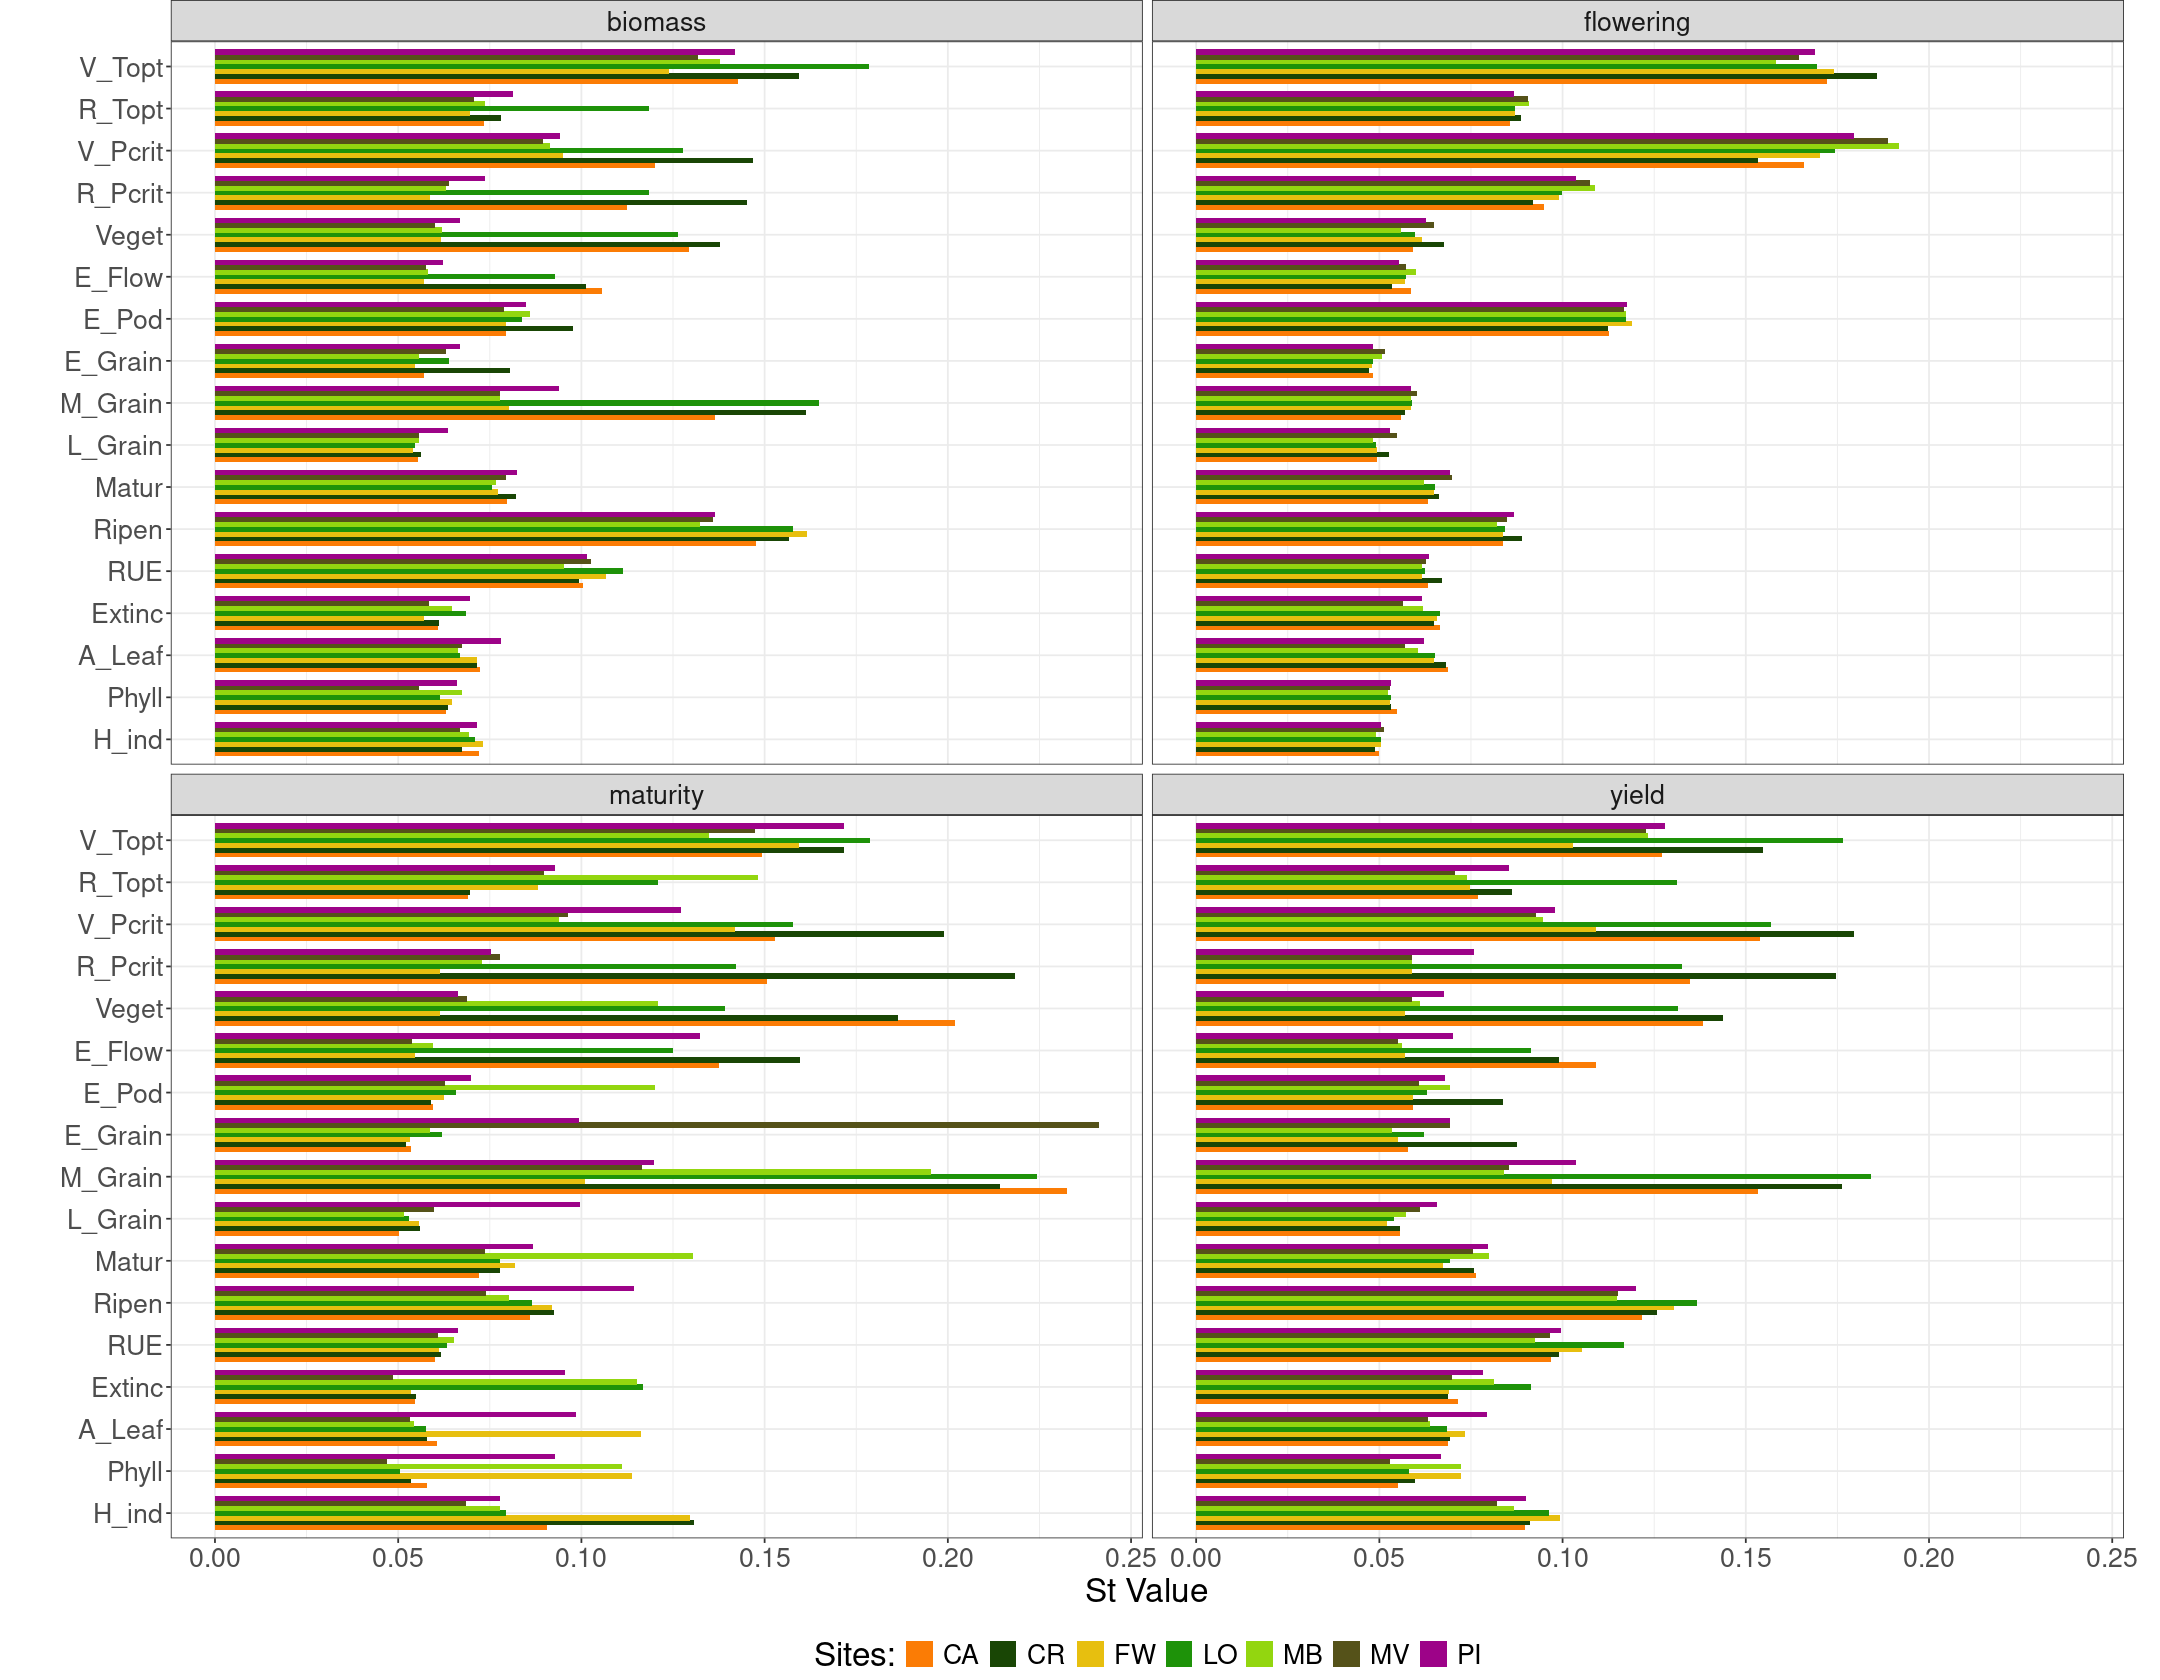

In [23]:
options(repr.plot.width=18, repr.plot.height=14)

cols <- c("#fb7c05", "#194605", "#e7bf0f", "#1e9209", "#93d60f", "#555219", "#9d0388", "#0982bb")

ggplot(data = bar_df, aes(x = names, y = mean, fill = campo)) +
  geom_bar(stat = "identity", position = position_dodge(0.8)) +
  theme_bw() +
  facet_wrap(param ~ .) +
  scale_fill_manual(name = "Sites:", values = cols, guide = guide_legend(nrow = 1)) +
  # scale_fill_viridis_d(
  #       name = "Sites",
  #       guide = guide_legend(nrow = 1),
  #       option = "turbo",
  #       direction = 1,
  # ) +
  # scale_fill_discrete_diverging(name="Sites", rev = F, palette = "Tofino", guide = guide_legend(nrow = 1)) + 
  # scale_fill_brewer(name="Sites", palette = "Set2", direction = 1, guide = guide_legend(nrow = 1)) +
  scale_x_discrete(name = "") +
  scale_y_continuous(name = "St Value") +
  theme(
      legend.position = "bottom",
      text = element_text(size = 20),
      # axis.text.x = element_text(angle = 45, vjust = 1, hjust=1),
      # legend.spacing.y = grid::unit(300, "cm"),
      plot.margin = unit(c(0, 0.3, 0, 0.2), "inches"),
      # legend.spacing.x = grid::unit(30, "cm")
      # legend.key.width = unit(1, "cm")
  ) +
  coord_flip()

# Chart Diverging Bar Plot

In [28]:
head(df_other_plots, 10)

opa <- df_other_plots %>%
  # filter(fert == "no") %>%
  # select(-fert) %>%
  filter(campo == "PI" | campo == "LO") %>%
  group_by(param, names, system_label) %>%
  summarise(
    mean = mean(value),
    sd = sd(value),
  ) %>%
  mutate(mean = ifelse(system_label == "irrigated", mean, -mean))

head(opa, 10)

names,field,param,campo_system,campo,state_year,state,system,system_label,year,field_i_r,month,field_novo,value
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
phen_VegTherTimeResp_X3,CA15,yield,CA0,CA,PR_2015,PR,0,0,2015,CA15,NA,CA,0.23240657
phen_RepTherTimeResp_X3,CA15,yield,CA0,CA,PR_2015,PR,0,0,2015,CA15,NA,CA,0.33765012
phen_VegPhoMod_X1,CA15,yield,CA0,CA,PR_2015,PR,0,0,2015,CA15,NA,CA,0.07461572
phen_RepPhoMod_X1,CA15,yield,CA0,CA,PR_2015,PR,0,0,2015,CA15,NA,CA,0.09092771
phen_VegetativeTarget,CA15,yield,CA0,CA,PR_2015,PR,0,0,2015,CA15,NA,CA,0.27326883
phen_EarlyFloweringTarget,CA15,yield,CA0,CA,PR_2015,PR,0,0,2015,CA15,NA,CA,0.32347933
phen_EarlyPodDevTarget,CA15,yield,CA0,CA,PR_2015,PR,0,0,2015,CA15,NA,CA,0.55525352
phen_FractGrainFill,CA15,yield,CA0,CA,PR_2015,PR,0,0,2015,CA15,NA,CA,0.13632192
phen_EntGrainFill,CA15,yield,CA0,CA,PR_2015,PR,0,0,2015,CA15,NA,CA,0.26165569


`summarise()` has grouped output by 'param', 'names'. You can override using
the `.groups` argument.


param,names,system_label,mean,sd
<chr>,<chr>,<chr>,<dbl>,<dbl>
biomass,grain_HarvIndex,irrigated,NaN,NA
biomass,grain_HarvIndex,rainfed,NaN,NA
biomass,leaf_AreaLargLeaf,irrigated,0.1399364,0.007260819
biomass,leaf_AreaLargLeaf,rainfed,-0.1421988,0.005770567
biomass,leaf_ExtinctionCoef_Y1,irrigated,NaN,NA
biomass,leaf_ExtinctionCoef_Y1,rainfed,-0.3528136,0.037118870
biomass,leaf_Phyllochron,irrigated,0.1417096,0.010321947
biomass,leaf_Phyllochron,rainfed,-0.1452628,0.013272955
biomass,leaf_RUE,irrigated,0.1926018,0.017806296


Warning message:
“A numeric `legend.position` argument in `theme()` was deprecated in ggplot2
3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead.”


Warning message:
“Removed 34 rows containing missing values or values outside the scale range
(`geom_bar()`).”


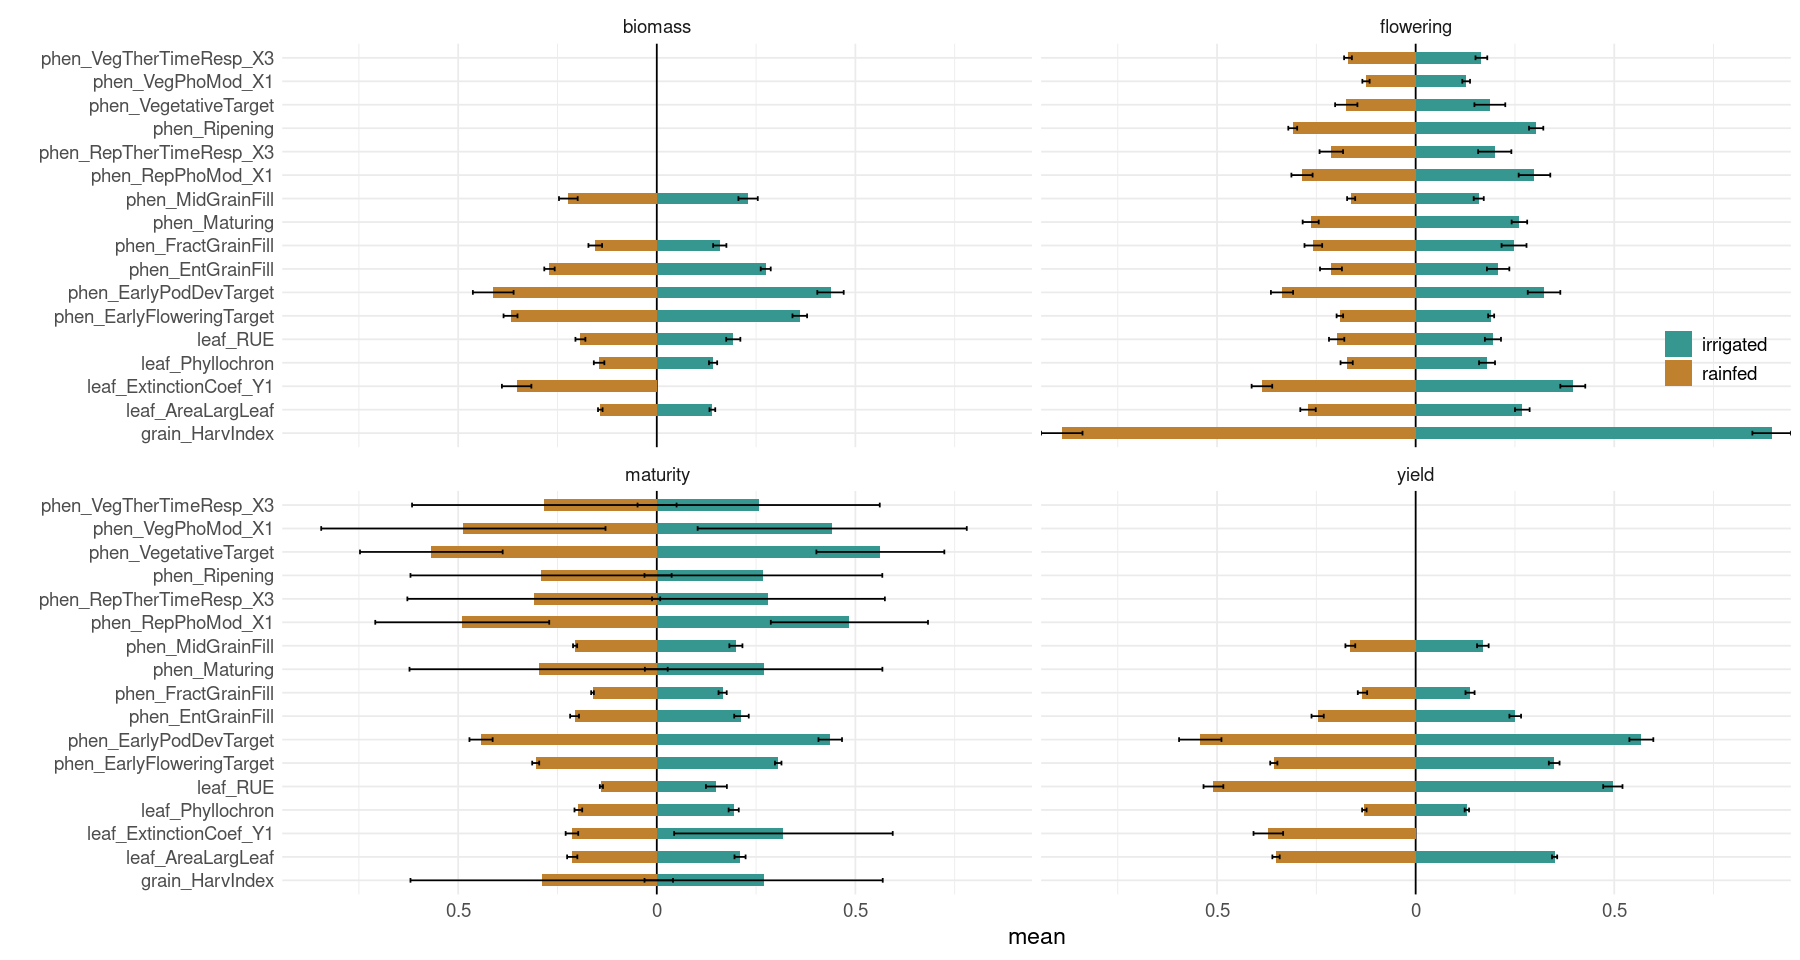

In [25]:
breaks_values <- pretty(opa$mean)

options(repr.plot.width = 15, repr.plot.height = 8)

opa %>%
  ggplot(aes(x = names, y = mean, fill = system_label)) +
  facet_wrap(param ~ .) +
  geom_hline(yintercept = 0) +
  geom_bar(stat = "identity", width = .5) +
  geom_errorbar(aes(ymin = mean - sd, ymax = mean + sd), width = .2) +
  scale_x_discrete(name = "") +

  scale_y_continuous(breaks = breaks_values, labels = abs(breaks_values), expand = c(0, 0)) +
  theme_minimal() +
  scale_fill_manual(name="", values = c("#35978f", "#bf812d")) +
  coord_flip() +
  theme(
    # legend.position = "bottom",
    legend.position = c(.95, .65),
    # axis.text.x = element_text(color = "black", size=16, angle=30, vjust=.8, hjust=0.8),
    text = element_text(size = 14),
    axis.text.y = element_text(hjust = 1)
  )

# Chart 5 - Polar - Irrigação

In [ ]:
library(ggradar)

por ultimo irrigação. Aqui só vai entrar os campos de londrina e pirac. Aí assim, são 3 datas cada, precisa fazer a média entre:
os que tem a,c,e (rainfed) e b,d,f (irrigado). Aí vai resultar 4 curvas kkkk
Londrina rainfed, londrina irri, pira rainf....... os params seriam as var ali no grafico, aí o efeito vai até 1 e a legenda seriam estes 4 que falei..... tbm queria um grid pras 4 que falei anterior.....

In [26]:
polar_df <- df_other_plots %>%
  # filter(fert == "no") %>%
  # select(-fert) %>%
  filter(campo == "PI" | campo == "LO") %>%
  group_by(param, names, campo_system) %>%
  summarise(
    mean = mean(value),
  )

unique(polar_df$campo_system)
dim(polar_df)
head(polar_df)

`summarise()` has grouped output by 'param', 'names'. You can override using
the `.groups` argument.


[1] "LOi" "LOr" "PIi" "PIr"

[1] 272   4

param,names,campo_system,mean
<chr>,<chr>,<chr>,<dbl>
biomass,grain_HarvIndex,LOi,0.3813865
biomass,grain_HarvIndex,LOr,0.3871056
biomass,grain_HarvIndex,PIi,NaN
biomass,grain_HarvIndex,PIr,NaN
biomass,leaf_AreaLargLeaf,LOi,0.1387311
biomass,leaf_AreaLargLeaf,LOr,0.1386497


In [27]:
generates_ggradar_df <- function(paramm) {
  pivot <- polar_df %>%
    filter(param == !!paramm) %>%
    rename(Group = campo_system) %>%
    tidyr::pivot_wider(names_from = names, values_from = mean) %>%
    ungroup() %>%
    select(-param)

  return(pivot)
}

pivot_yield <- generates_ggradar_df("Yield")
pivot_biomass <- generates_ggradar_df("Biomass")
pivot_maturity <- generates_ggradar_df("Maturity")
pivot_flowering <- generates_ggradar_df("Flowering")
dim(pivot_yield)
head(pivot_yield)

gg1 <- ggradar(pivot_yield, legend.position = "none")
gg2 <- ggradar(pivot_biomass, legend.position = "none")
gg3 <- ggradar(pivot_maturity, legend.position = "none")
gg4 <- ggradar(pivot_flowering, legend.position = "none")
p <- list(gg1, gg2, gg3, gg4)

plot_legend <- ggradar(pivot_yield, legend.position = "bottom", legend.title = "Site Condition")
legend <- get_legend(plot_legend)

options(repr.plot.width = 12, repr.plot.height = 12)

plot_fill <- arrangeGrob(
  grobs = p,
  ncol = 2, nrow = 2,
  widths = c(2, 2),
  heights = c(2, 2)
)

arrange <- grid.arrange(
  plot_fill, legend,
  ncol = 1, nrow = 2,
  widths = c(10),
  heights = c(9, 1)
)

[1] 0 1

Group
<chr>


ERROR: Error in ggradar(pivot_yield, legend.position = "none"): could not find function "ggradar"


[1] 0.00 0.25 0.50 0.75 1.00

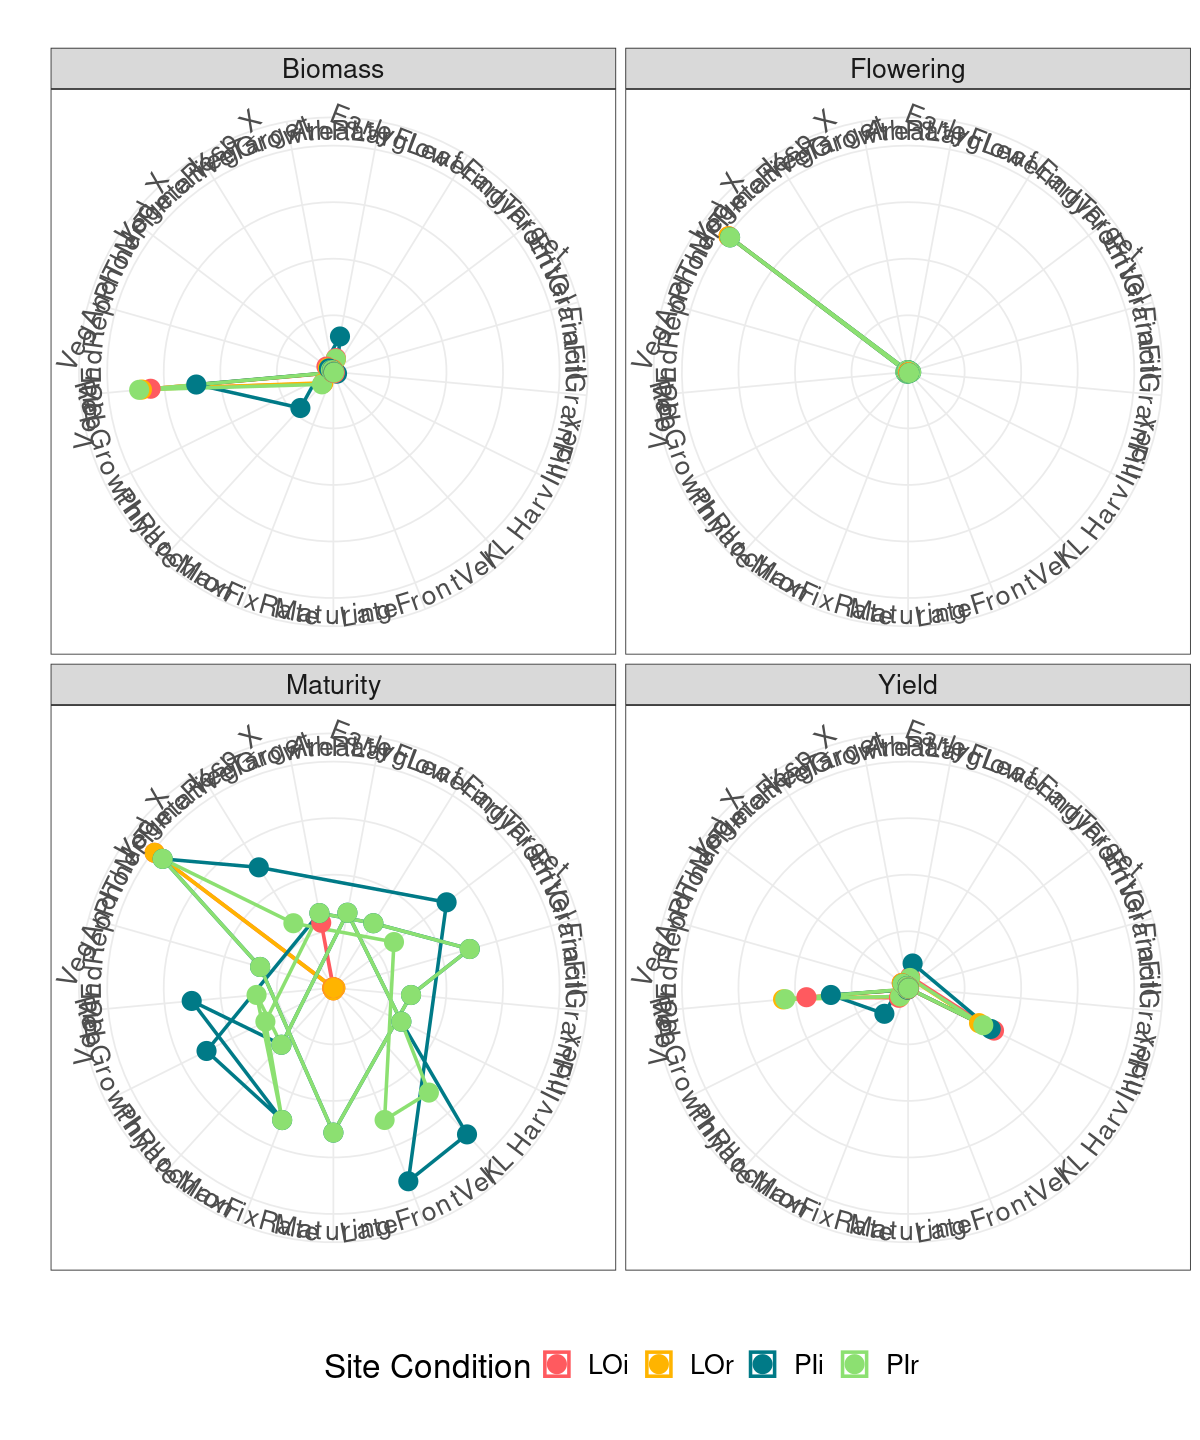

In [124]:
options(repr.plot.width = 10, repr.plot.height = 12)

cols <- c("#ff5a5f", "#ffb400", "#007a87", "#8ce071")
my_breaks <- scales::extended_breaks()(polar_df$mean)
my_breaks
# my_breaks <- my_breaks[2:(length(my_breaks)-1)]
# my_breaks

ggplot(data = polar_df, aes(x = names, y = mean, colour = campo_system, group = campo_system)) +
  facet_wrap(. ~ param, ncol=2) +
  # coord_polar() +
  # geom_line(lwd = 1.5, linetype = 1) +
  geom_polygon(lwd = 1, fill = NA) +
  # geom_path(lwd = 1)+
  geom_point(size = 5) +
  theme_bw() +
  scale_colour_manual(name = "Site Condition", values = cols, guide = guide_legend(nrow = 1)) +
  # scale_colour_discrete(name = "Site Condition") +
  scale_y_continuous(name = "", limits = c(0, 1)) +
  scale_x_discrete(name = "") +
  # annotate('text', x = 0, y = brk, label = as.character(brk)) +
  # annotate('text', x = rep(0,3), y = brk, label = as.character(brk)) +

  theme(
    axis.ticks.y = element_blank(),
    axis.text.y = element_blank(),

    panel.grid.minor = element_blank(),
    legend.position = "bottom",
    text = element_text(size = 20),
    # axis.text.x = element_text(angle = 45, vjust = 1, hjust=1),
    # legend.spacing.y = grid::unit(5, "cm")
  ) +
  coord_curvedpolar(theta = "x")

  # annotate('text', x = c(0,0,0,0,0), y = my_breaks, label = my_breaks)

# DEPRECATED - Chart 6 - Heatmap

In [100]:
# df_heatmap <- df_other_plots %>%
#     filter(param == "Yield") %>%
#     # mutate(fert = case_when(
#     #     grepl("yes", fert) ~ "Fertilization 10kg/ha",
#     #     grepl("no", fert)  ~ "Fertilization 0kg/ha",
#     #     .default = NA)
#     # ) %>%
#     select(c(names, field_i_r, value)) %>%
#     group_by(names, field_i_r) %>%
#     summarise(
#         mean = mean(value),
#         .groups = 'drop_last'
#     ) %>%
#     group_by(field_i_r) %>%
#     mutate(rank = as.integer(rank(-mean)))

# unique(df_heatmap$rank)
# dim(df_heatmap)
# head(df_heatmap)

In [102]:
# options(repr.plot.width=14, repr.plot.height=12)

# ggplot(data = df_heatmap, aes(x=field_i_r, y=names, fill=factor(rank))) +
#     geom_tile(color = "white", lwd = 1.5, linetype = 1) +
#     geom_text(aes(label = round(rank, 2)), color = "black", size = 4, fontface = "bold", check_overlap = TRUE) +
#     # facet_wrap(fert ~ ., ncol = 1) +
#     # scale_fill_viridis_d(
#     #     name = "Ranking",
#     #     guide = guide_legend(nrow = 1)
#     # ) + 
#     scale_fill_discrete_sequential(name="Sites", rev = F, palette = "BluGrn", guide = guide_legend(nrow = 1)) + 
#     # scale_fill_brewer(, palette = "Set1", direction = 1, ) +
#     scale_x_discrete(name = "Sites") +
#     scale_y_discrete(name = "") +
#     theme(
#         legend.position = "none",
#         text = element_text(size = 20),
#         axis.text.x = element_text(angle = 45, vjust = 1, hjust=1),
#         legend.spacing.y = grid::unit(5, "cm"),
#         axis.title.x = element_text(vjust = -0.2)
#     )